In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
import pandas as pd
from pybt.tools.plotters import *
from pybt.tools.air_scattering_functions import *
import requests
from madxtools.plot_tool import *

/Users/eliottjohnson/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
T = 23.08 # GeV kinetic energy
# T = 4.54 # GeV kinetic energy ion equivalent of 750 MeV/u
E0 = 0.938 # GeV/c^2 proton rest mass
E = T + E0 # total energy
gamma = E / E0 # gamma
beta = np.sqrt(1-gamma**(-2))
p = E*beta # GeV/c beam momentum

print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p,3)} GeV/c")

gamma = 25.606
beta = 0.999
p = 24.0 GeV/c


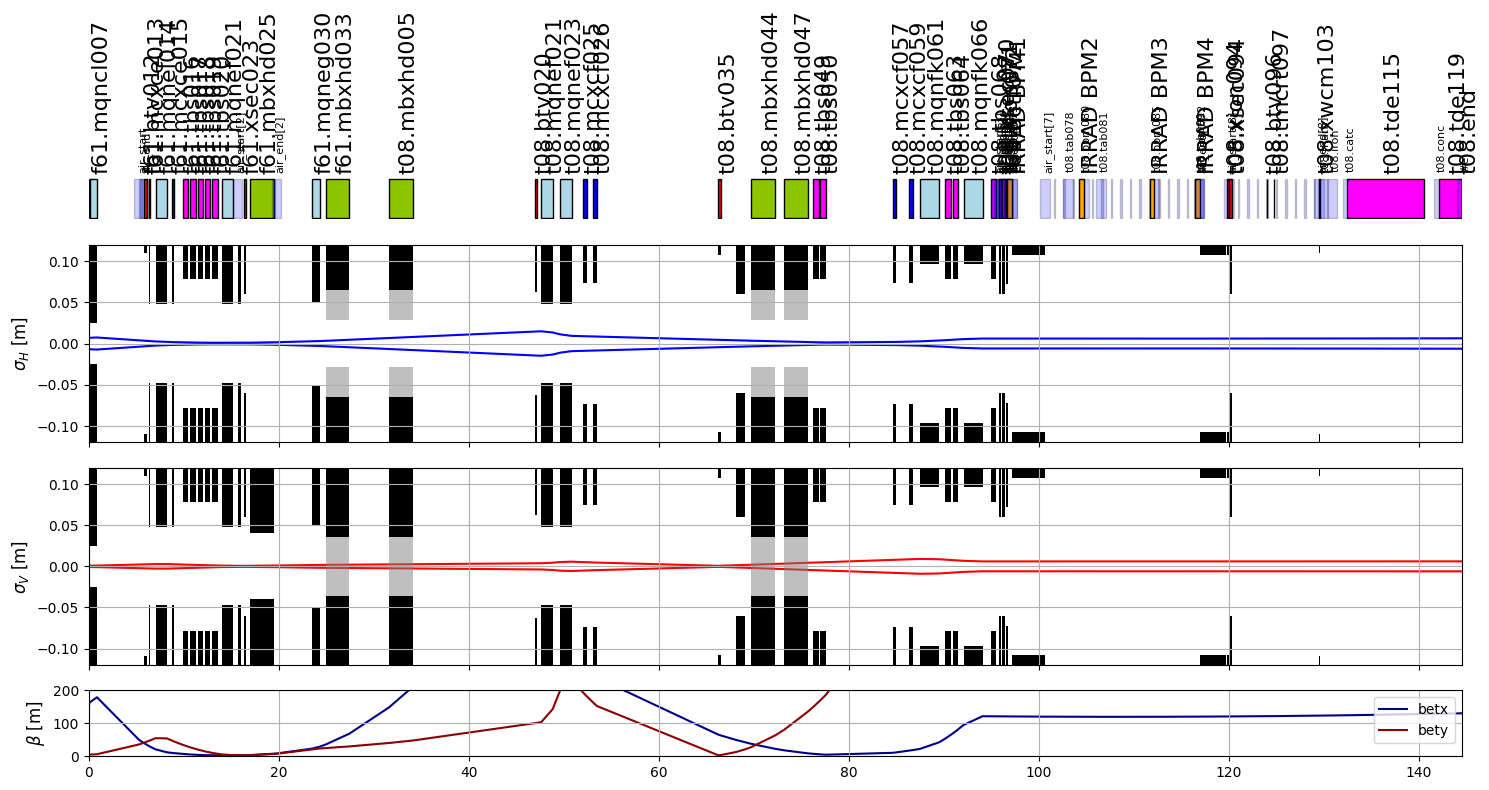

In [3]:
# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Initial dipole strengths
madx.input("kBHZ1 = -0.04821227494157728;")
madx.input("kBHZ2 = 0.04980753403890888;")
madx.input("kBHZ3 = 0.02555487086003289;")
madx.input("kBHZ4 = -0.03515967369417004;")
madx.input("kBHZ5 = -0.03515967369417004;")


# Computed quad strength with values from 2021-11-12
madx.input("kQFN1 = "+str(0.44499)+";")
madx.input("kQDN2 = "+str(-0.18843)+";")
madx.input("kQFN3 = "+str(0.2028)+";")
madx.input("kQDN4 = "+str(-0.09104)+";")
madx.input("kQFN5 = "+str(0.19382944200388946)+";")
madx.input("kQDN6 = "+str(-0.21251805146629948)+";")
madx.input("kQDN7 = "+str(-0.06362635467007315)+";")
madx.input("kQFN8 = "+str(0.06014664703049756)+";")


# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

madx.use(sequence="f61t8_op")

twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])



In [4]:
 # Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p, twiss, ex_initial, ey_initial)

0
ok1
0.25 0
0
ok2
0.3000000000000007 0
0
ok2
0.16249999999999432 0
0
ok2
0.04999999999999716 0
0
ok2
0.041499999999999204 0
0
ok2
0.18099999999999739 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
ok2
0.26899999999999125 15
0
1
2
3
4
5
6
7
8
ok2
0.48099999999999454 8


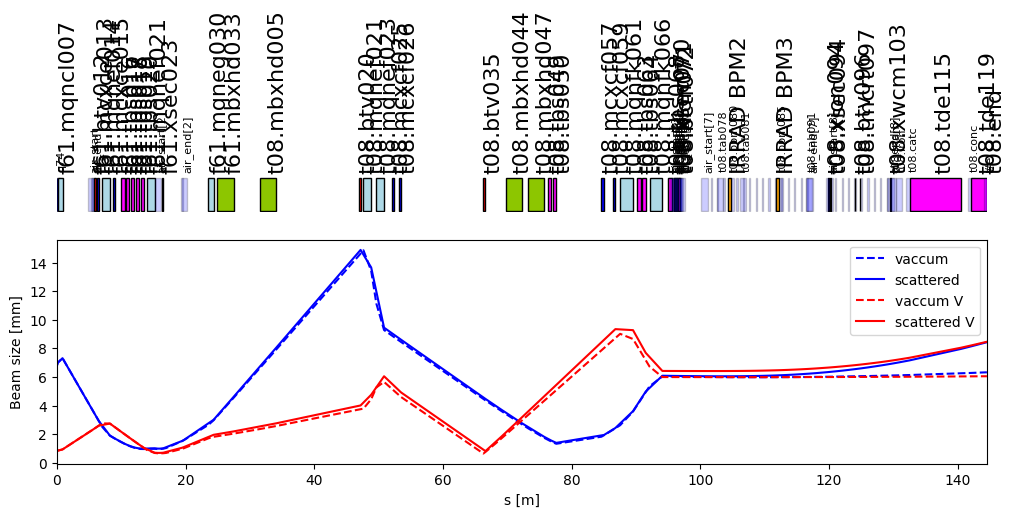

In [5]:
fig, ax = plt.subplots(2,1 ,figsize=(12, 4), sharex=True, height_ratios=[1, 4])

draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 1), ls="--", c="b", label='vaccum')
ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.betx, twiss_scattered.dx, twiss_scattered.ex, sige, 1), c="b", label='scattered')

ax[1].plot(twiss.s, 1000*beam_size(twiss.bety, twiss.dy, twiss.ey, twiss.dpy, 1), ls="--", c="r", label='vaccum V')
ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.bety, twiss_scattered.dy, twiss_scattered.ey, sige, 1), c="r", label='scattered V')

ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam size [mm]')
ax[1].legend()

In [6]:
s_list = []
sigma_list = []
for bpm in ["t08.bpm073","t08.bpm080","t08.bpm085","t08.bpm092"]:

    s = twiss.loc[bpm].s
    print(s)
    sigma = 1000*beam_size(twiss_scattered.loc[twiss_scattered.s == s].betx, twiss_scattered.loc[twiss_scattered.s == s].dx, twiss_scattered.loc[twiss_scattered.s == s].ex, sige, 1)
    print(sigma)

    s_list.append(s)
    sigma_list.append(sigma)

97.17936726075136
air_end[6]    6.068711
dtype: float64
104.79136726075136
t08.bpm080    6.050869
dtype: float64
112.18636726075135
t08.bpm085    6.117315
dtype: float64
116.94836726075135
air_end[7]    6.23566
dtype: float64
